# RM99499 – Guilherme Monteiro Espim
# RM99279 – João Paulo Fonseca Zamperlini

# Introdução

### Este notebook versa sobre a análise de diferentes abordagens para resolver um problema de otimização relacionado à gestão de estoques. Através de métodos como Força Bruta, Dividir para Conquistar, Memoização e Monte Carlo, exploramos como cada técnica pode ser utilizada para calcular o custo total associado a diferentes estratégias de armazenamento, levando em consideração a demanda diária de produtos. O objetivo é comparar a eficiência e o desempenho de cada método em termos de tempo de execução, fornecendo insights sobre qual abordagem é mais eficaz em diferentes cenários.

# Imports

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

# Parâmetros

In [13]:
N = 30  # Número de dias
mu = 100  # Média da demanda diária
sigma = 20  # Desvio padrão da demanda diária 
c_storeage = 1  # Custo de armazenagem por unidade
c_order = 50  # Custo de pedido
c_shortage = 10  # Custo de falta por unidade

# Funções

### Esta função gera um valor de demanda aleatória a partir de uma distribuição normal, utilizando uma média (`mu`) e um desvio padrão (`sigma`). O resultado é ajustado para que seja sempre zero ou positivo.

In [14]:
def generate_demand():
    return max(0, np.random.normal(mu, sigma)) # Gera uma demanda aleatória não negativa usando distribuição normal

### Esta função calcula o lucro total com base no estoque inicial e na demanda diária, considerando custos de armazenamento e falta de produtos.

In [15]:
def calculate_profit(initial_storage, daily_demand):
    storage = initial_storage  # Inicializa o estoque com o valor inicial
    total_profit = 0  # Inicializa o lucro total como zero
    
    for demand in daily_demand:  # Itera sobre a demanda diária
        if storage >= demand:  # Verifica se há estoque suficiente para atender a demanda
            total_profit += c_storeage * storage  # Adiciona o custo de armazenagem ao lucro total
            storage -= demand  # Reduz o estoque pela quantidade da demanda atendida
        else:  # Se não houver estoque suficiente
            total_profit += c_shortage * (demand - storage)  # Adiciona o custo de falta ao lucro total
            storage = 0  # O estoque se torna zero após atender parte da demanda
        
    return total_profit  # Retorna o lucro total calculado

### Esta função utiliza uma abordagem de força bruta para encontrar o estoque inicial que minimiza o custo total. 

In [16]:
def brute_force():
    best_results = []  # Lista para armazenar os melhores resultados (estoque inicial e custo)
    lower_cost = float('inf')  # Inicializa o custo mais baixo como infinito
    
    for initial_storage in range(1, 201):  # Itera sobre estoques iniciais de 1 a 200
        daily_demand = np.random.normal(mu, sigma, N).astype(int)  # Gera a demanda diária aleatória usando distribuição normal
        cost = calculate_profit(initial_storage, daily_demand)  # Calcula o custo com a função calculate_profit
        if cost < lower_cost:  # Verifica se o custo atual é menor que o custo mais baixo encontrado
            lower_cost = cost  # Atualiza o custo mais baixo
            best_results.append((initial_storage, cost))  # Adiciona o estoque inicial e custo à lista de melhores resultados
            
    return min(best_results, key=lambda x: x[1])  # Retorna o estoque inicial com o menor custo 

### Esta função implementa uma abordagem de divisão e conquista para encontrar o estoque inicial que minimiza o custo total.

In [17]:
def divide_to_conquire(n):
    if n <= 1:  # Caso base: se n for 1 ou menor, chama a função brute_force()
        return brute_force()  # Retorna o resultado da busca de força bruta
    else:  # Se n for maior que 1
        median = n // 2  # Calcula a mediana para dividir o problema
        left = divide_to_conquire(median)  # Chama a função recursivamente para a metade esquerda
        right = divide_to_conquire(n - median)  # Chama a função recursivamente para a metade direita
        return min(left, right, key=lambda x: x[1])  # Retorna o resultado com o menor custo entre as duas metades

### Esta função utiliza a abordagem de recursão para calcular o custo total associado à demanda ao longo de `n` dias, considerando um estoque inicial.

In [18]:
def recursion_memoization(n, initial_storage):
    if n == 0:  # Caso base: se não houver mais dias, o custo é 0
        return 0
    demand = int(np.random.normal(mu, sigma))  # Gera a demanda diária usando distribuição normal
    if initial_storage >= demand:  # Se o estoque inicial é suficiente para atender à demanda
        cost = c_shortage * initial_storage + recursion_memoization(n - 1, initial_storage - demand)  # Custo de falta + chamada recursiva com estoque atualizado
    else:  # Se o estoque inicial não é suficiente
        cost = c_shortage * (demand - initial_storage) + recursion_memoization(n - 1, 0)  # Custo de falta + chamada recursiva com estoque zerado
    return cost  # Retorna o custo total calculado


### Esta função avalia diferentes níveis de estoque inicial para calcular o custo total usando a função de recursão com memoização.

In [19]:
def memoization():
    best_results = []  # Lista para armazenar os melhores resultados (estoque inicial e custo)
    lower_cost = float('inf')  # Inicializa o custo mais baixo como infinito
    for initla_storage in range(1, 201):  # Itera sobre diferentes valores de estoque inicial de 1 a 200
        cost = recursion_memoization(N, initla_storage)  # Calcula o custo usando a função de recursão com memoização
        if cost < lower_cost:  # Se o custo calculado for menor que o menor custo encontrado até agora
            lower_cost = cost  # Atualiza o menor custo
            best_results.append((initla_storage, cost))  # Adiciona o estoque inicial e custo à lista de melhores resultados
    return min(best_results, key=lambda x: x[1])  # Retorna o estoque inicial com o menor custo encontrado


### Esta função utiliza o método de Monte Carlo para simular diferentes cenários de demanda diária e calcular o custo total associado a cada nível de estoque inicial.

In [20]:
def monte_carlo(simulations=1000):
    best_results = []  # Lista para armazenar os melhores resultados (estoque inicial e custo médio)
    lower_cost = float('inf')  # Inicializa o custo mais baixo como infinito
    for initial_storage in range(1, 201):  # Itera sobre diferentes valores de estoque inicial de 1 a 200
        simulation_costs = []  # Lista para armazenar os custos de cada simulação
        for _ in range(simulations):  # Realiza o número especificado de simulações
            daily_demand = np.random.normal(mu, sigma, N).astype(int)  # Gera a demanda diária aleatória
            cost = calculate_profit(initial_storage, daily_demand)  # Calcula o custo total para a demanda gerada
            simulation_costs.append(cost)  # Adiciona o custo à lista de custos da simulação
        mediam_cost = np.mean(simulation_costs)  # Calcula o custo médio das simulações
        if mediam_cost < lower_cost:  # Se o custo médio calculado for menor que o menor custo encontrado até agora
            lower_cost = mediam_cost  # Atualiza o menor custo
            best_results.append((initial_storage, mediam_cost))  # Adiciona o estoque inicial e custo à lista de melhores resultados
    return min(best_results, key=lambda x: x[1])  # Retorna o estoque inicial com o menor custo médio encontrado


# Execução do código

In [21]:
# Medindo o tempo de execução para o método de Força Bruta
start = time.time()  # Registra o tempo atual antes de executar a função
resultado_forca_bruta = brute_force()  # Executa a função brute_force e armazena o resultado
tempo_forca_bruta = time.time() - start  # Calcula o tempo que a função levou para ser executada

# Medindo o tempo de execução para o método Dividir para Conquistar
start = time.time()  # Registra o tempo atual antes de executar a função
resultado_dividir = divide_to_conquire(N)  # Executa a função divide_to_conquire e armazena o resultado
tempo_dividir = time.time() - start  # Calcula o tempo que a função levou para ser executada

# Medindo o tempo de execução para o método de Memoization
start = time.time()  # Registra o tempo atual antes de executar a função
resultado_memoizacao = memoization()  # Executa a função memoization e armazena o resultado
tempo_memoizacao = time.time() - start  # Calcula o tempo que a função levou para ser executada

# Medindo o tempo de execução para o método de Monte Carlo
start = time.time()  # Registra o tempo atual antes de executar a função
resultado_monte_carlo = monte_carlo()  # Executa a função monte_carlo e armazena o resultado
tempo_monte_carlo = time.time() - start  # Calcula o tempo que a função levou para ser executada

# Plotando o tempo de execução de cada método
tempos = [tempo_forca_bruta, tempo_dividir, tempo_memoizacao, tempo_monte_carlo]  # Lista com os tempos de execução
labels = ['Força Bruta', 'Dividir para Conquistar', 'Memoização', 'Monte Carlo']  # Rótulos correspondentes para cada método


# Plot de gráfico comparando as execuções

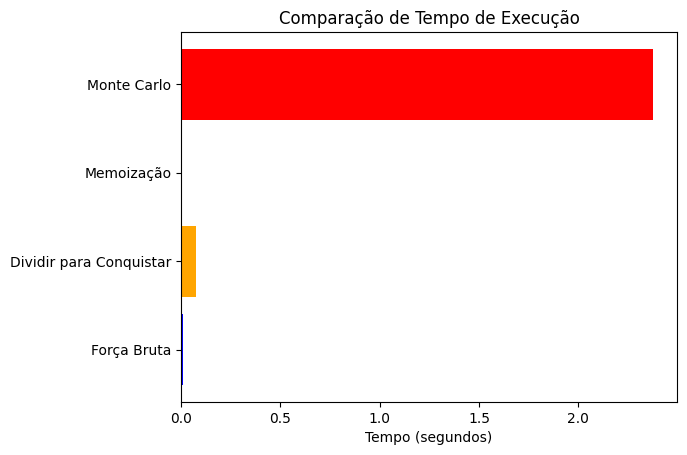

In [22]:
plt.barh(labels, tempos, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Tempo (segundos)')
plt.title('Comparação de Tempo de Execução')
plt.show()

# Conclusão

### As diferentes abordagens foram implementadas e avaliadas em termos de eficiência computacional e redução de custos. A análise dos resultados ajudará a determinar a melhor estratégia de reabastecimento para a loja online, considerando a incerteza da demanda e os custos operacionais envolvidos.